In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

1.Data

In [41]:
def generate_time_series(m, n_seq):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, m, 1)
    time = np.linspace(0, 1, n_seq)
    series =0.5* np.cos((time-offsets1)*(freq1*10+10))
    series +=0.3* np.sin((time-offsets2)*(freq2*20+20))
    series += 0.1 * (np.random.rand(m, n_seq)-0.5)
    return series[..., np.newaxis].astype(np.float32)

In [42]:
np.random.seed(1)
n_seq = 30
n_pred =1
series = generate_time_series(5000,n_seq + n_pred)
series.shape

x_train, y_train = series[:3000, :n_seq], series[:3000, -1]
x_valid, y_valid = series[3000:4000, :n_seq], series[3000:4000, -1]
x_test, y_test = series[4000:, :n_seq], series[4000:, -1]
x_train.shape, y_train.shape

((3000, 30, 1), (3000, 1))

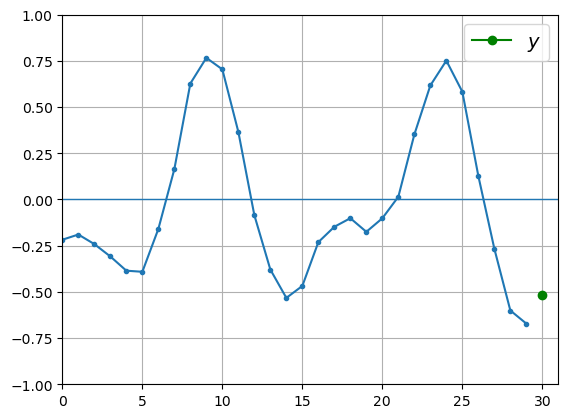

In [43]:
def plot_seq(x,y,y_pred=None):
    plt.plot(x,'.-')
    n_seq = x.shape[0]
    ahead = y.shape[0]
    plt.plot(np.arange(n_seq, n_seq + ahead), y, 'go-', label='$y$')
    if y_pred is not None:
        plt.plot(np.arange(n_seq, n_seq + ahead), y_pred, 'rx-',
        label='$lhat y$', markersize=10)
    plt.hlines(0, 0, n_seq + ahead, linewidth=1)
    plt.axis([0, n_seq + ahead, -1, 1])
    plt.grid(True)
    plt.legend(fontsize=14)

plot_seq(x_test[0, :, 0], y_test[0])

In [44]:
np.random.seed(1)
tf.random.set_seed(1)

model = keras.models. Sequential([
    keras.layers.SimpleRNN(1,input_shape=[None, 1])
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_6 (SimpleRNN)    (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [45]:
opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.05)
model.compile(loss='mse', optimizer=opt)

In [46]:
train = model.fit(x_train, y_train, epochs=20, validation_data=(x_valid, y_valid))

Epoch 1/20
94/94 [==============================] - 1s 3ms/step - loss: 0.0833 - val_loss: 0.0309
Epoch 2/20
94/94 [==============================] - 0s 2ms/step - loss: 0.0301 - val_loss: 0.0297
Epoch 3/20
94/94 [==============================] - 0s 2ms/step - loss: 0.0299 - val_loss: 0.0290
Epoch 4/20
94/94 [==============================] - 0s 2ms/step - loss: 0.0299 - val_loss: 0.0284
Epoch 5/20
94/94 [==============================] - 0s 2ms/step - loss: 0.0300 - val_loss: 0.0287
Epoch 6/20
94/94 [==============================] - 0s 2ms/step - loss: 0.0299 - val_loss: 0.0284
Epoch 7/20
94/94 [==============================] - 0s 3ms/step - loss: 0.0300 - val_loss: 0.0285
Epoch 8/20
94/94 [==============================] - 0s 4ms/step - loss: 0.0300 - val_loss: 0.0284
Epoch 9/20
94/94 [==============================] - 0s 3ms/step - loss: 0.0298 - val_loss: 0.0286
Epoch 10/20
94/94 [==============================] - 0s 3ms/step - loss: 0.0302 - val_loss: 0.0301
Epoch 11/20
94/94 [

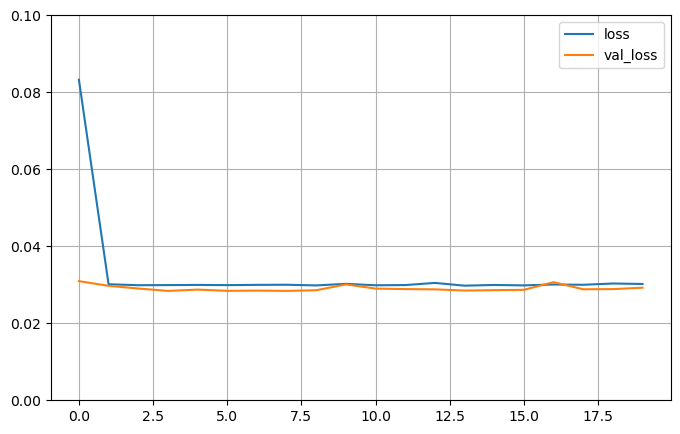

In [47]:
pd.DataFrame(train.history).plot(figsize=(8,5))
plt.grid(True)
plt.ylim(0,0.1)
plt.show()

In [48]:
model.evaluate(x_test,y_test)

32/32 [==============================] - 0s 1ms/step - loss: 0.0309


0.030890202149748802

32/32 [==============================] - 0s 941us/step


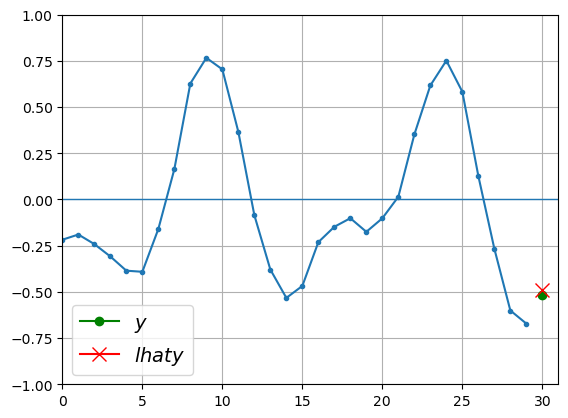

In [49]:
y_pred = model.predict(x_test)
i = 0
plot_seq(x_test[i, :, 0], y_test[i], y_pred[i])

Deep RNN

In [50]:
np.random.seed(1)
tf.random.set_seed(1)

model = keras.models.Sequential([
    keras.layers.SimpleRNN(20,return_sequences=True,input_shape=[None, 1]),
    keras.layers.SimpleRNN(20,return_sequences=True),
    keras.layers.SimpleRNN(1)
])

In [51]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_7 (SimpleRNN)    (None, None, 20)          440       
                                                                 
 simple_rnn_8 (SimpleRNN)    (None, None, 20)          820       
                                                                 
 simple_rnn_9 (SimpleRNN)    (None, 1)                 22        
                                                                 
Total params: 1282 (5.01 KB)
Trainable params: 1282 (5.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [52]:
model.compile(loss='mse',optimizer='adam')

In [53]:
train=model.fit(x_train,y_train,epochs=20,validation_data=(x_valid,y_valid))

Epoch 1/20
94/94 [==============================] - 2s 8ms/step - loss: 0.0994 - val_loss: 0.0340
Epoch 2/20
94/94 [==============================] - 1s 8ms/step - loss: 0.0252 - val_loss: 0.0211
Epoch 3/20
94/94 [==============================] - 1s 8ms/step - loss: 0.0183 - val_loss: 0.0160
Epoch 4/20
94/94 [==============================] - 1s 7ms/step - loss: 0.0137 - val_loss: 0.0124
Epoch 5/20
94/94 [==============================] - 1s 7ms/step - loss: 0.0110 - val_loss: 0.0107
Epoch 6/20
94/94 [==============================] - 1s 7ms/step - loss: 0.0100 - val_loss: 0.0084
Epoch 7/20
94/94 [==============================] - 1s 7ms/step - loss: 0.0085 - val_loss: 0.0072
Epoch 8/20
94/94 [==============================] - 1s 7ms/step - loss: 0.0080 - val_loss: 0.0071
Epoch 9/20
94/94 [==============================] - 1s 7ms/step - loss: 0.0077 - val_loss: 0.0081
Epoch 10/20
94/94 [==============================] - 1s 7ms/step - loss: 0.0072 - val_loss: 0.0062
Epoch 11/20
94/94 [

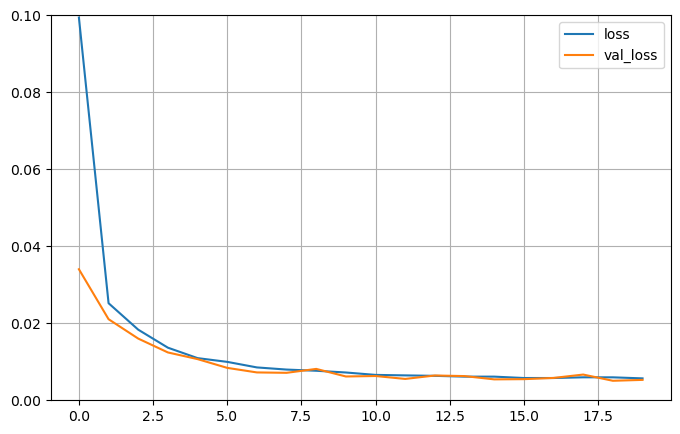

In [54]:
pd.DataFrame(train.history).plot(figsize=(8,5))
plt.grid(True)
plt.ylim(0,0.1)
plt.show()

In [55]:
model.evaluate(x_test,y_test)

32/32 [==============================] - 0s 2ms/step - loss: 0.0062


0.006226027850061655

In [56]:
y_pred=model.predict(x_test)

32/32 [==============================] - 0s 2ms/step


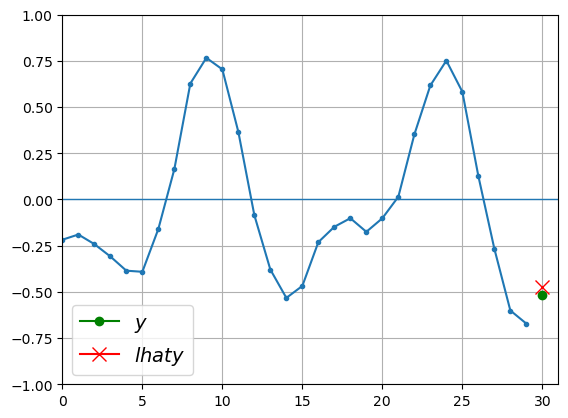

In [57]:
i=0
plot_seq(x_test[i,:,0],y_test[i],y_pred[i])

Deep RNN(dense output layer)

In [81]:
np.random.seed(1)
tf.random.set_seed(1)

model = keras.models.Sequential([
    keras.layers.SimpleRNN(20,return_sequences=True,input_shape=[None, 1]),
    keras.layers. SimpleRNN(20),
    keras.layers.Dense(1)
])

In [82]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_14 (SimpleRNN)   (None, None, 20)          440       
                                                                 
 simple_rnn_15 (SimpleRNN)   (None, 20)                820       
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 1281 (5.00 KB)
Trainable params: 1281 (5.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [83]:
model.compile(loss='mse',optimizer='adam')

In [84]:
train=model.fit(x_train,y_train,epochs=20,validation_data=(x_valid,y_valid))

Epoch 1/20
94/94 [==============================] - 1s 6ms/step - loss: 0.0851 - val_loss: 0.0235
Epoch 2/20
94/94 [==============================] - 1s 6ms/step - loss: 0.0140 - val_loss: 0.0113
Epoch 3/20
94/94 [==============================] - 1s 6ms/step - loss: 0.0093 - val_loss: 0.0083
Epoch 4/20
94/94 [==============================] - 1s 5ms/step - loss: 0.0079 - val_loss: 0.0075
Epoch 5/20
94/94 [==============================] - 0s 5ms/step - loss: 0.0072 - val_loss: 0.0072
Epoch 6/20
94/94 [==============================] - 0s 5ms/step - loss: 0.0071 - val_loss: 0.0065
Epoch 7/20
94/94 [==============================] - 0s 5ms/step - loss: 0.0066 - val_loss: 0.0067
Epoch 8/20
94/94 [==============================] - 0s 5ms/step - loss: 0.0067 - val_loss: 0.0062
Epoch 9/20
94/94 [==============================] - 1s 5ms/step - loss: 0.0069 - val_loss: 0.0059
Epoch 10/20
94/94 [==============================] - 1s 6ms/step - loss: 0.0068 - val_loss: 0.0066
Epoch 11/20
94/94 [

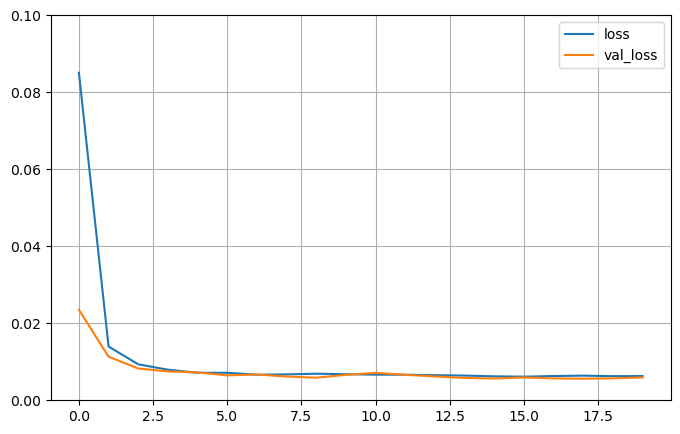

In [85]:
pd.DataFrame(train.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,0.1)
plt.show()

In [86]:
model.evaluate(x_test,y_test)

32/32 [==============================] - 0s 2ms/step - loss: 0.0062


0.006225725170224905

In [87]:
y_pred=model.predict(x_test)

32/32 [==============================] - 0s 1ms/step


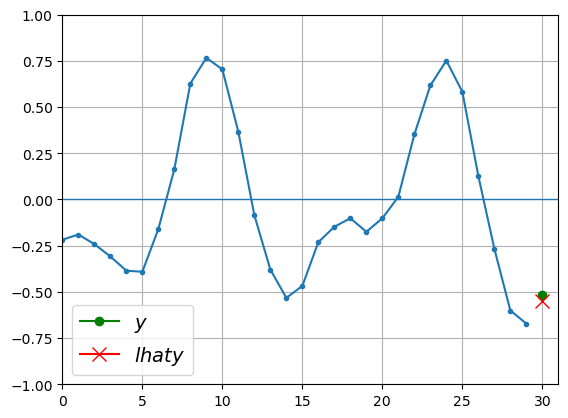

In [88]:
i=0
plot_seq(x_test[i,:,0],y_test[i],y_pred[i])

Predict 10 steps ahead

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras


In [103]:
def generate_time_series(m, n_seq):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, m, 1)
    time = np.linspace(0, 1, n_seq)
    series = 0.5 * np.cos((time- offsets1)*(freq1*10+10))
    series+= 0.3*np.sin((time-offsets2)*(freq2*20+20))
    series += 0.1*(np.random.rand(m, n_seq) - 0.5)
    return series[...,np.newaxis].astype(np.float32)

In [104]:
np.random.seed(1)
n_seq = 30
n_pred = 10
series = generate_time_series(5000, n_seq+ n_pred)
series.shape

(5000, 40, 1)

In [105]:
x_train, y_train = series[:3000, :n_seq], series[:3000,-n_pred:,0]
x_valid, y_valid = series[3000:4000, :n_seq], series[3000:4000,-n_pred:,0]
x_test, y_test = series[4000:, :n_seq], series[4000:, -n_pred:,0]
x_train.shape, y_train.shape

((3000, 30, 1), (3000, 10))

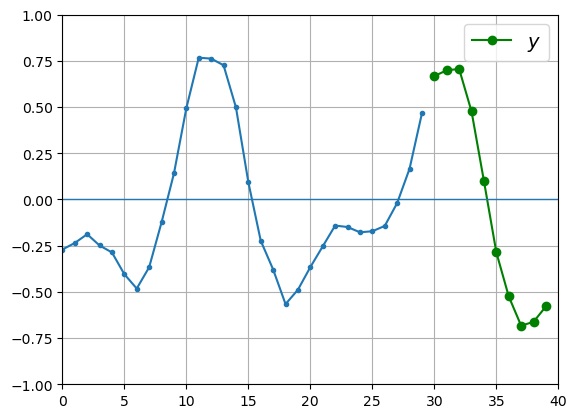

In [106]:
def plot_seq(x,y,y_pred=None):
    plt.plot(x,'.-')
    n_seq = x.shape[0]
    ahead = y.shape[0]
    plt.plot(np.arange(n_seq, n_seq + ahead), y, 'go-', label='$y$')
    if y_pred is not None:
        plt.plot(np.arange(n_seq, n_seq + ahead), y_pred, 'rx-',
        label='$lhat y$', markersize=10)
    plt.hlines(0, 0, n_seq + ahead, linewidth=1)
    plt.axis([0, n_seq + ahead, -1, 1])
    plt.grid(True)
    plt.legend(fontsize=14)

plot_seq(x_test[0, :, 0], y_test[0])

In [107]:
np.random.seed(1)
tf.random.set_seed(1)

model = keras.models.Sequential([
    keras.layers.SimpleRNN(20,return_sequences=True,input_shape=[None, 1]),
    keras.layers. SimpleRNN(20),
    keras.layers.Dense(10)
])

In [108]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_18 (SimpleRNN)   (None, None, 20)          440       
                                                                 
 simple_rnn_19 (SimpleRNN)   (None, 20)                820       
                                                                 
 dense_5 (Dense)             (None, 10)                210       
                                                                 
Total params: 1470 (5.74 KB)
Trainable params: 1470 (5.74 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [109]:
model.compile(loss='mse',optimizer='adam')

In [110]:
train=model.fit(x_train,y_train,epochs=20,validation_data=(x_valid,y_valid))

Epoch 1/20
94/94 [==============================] - 1s 6ms/step - loss: 0.1681 - val_loss: 0.0995
Epoch 2/20
94/94 [==============================] - 1s 5ms/step - loss: 0.0850 - val_loss: 0.0757
Epoch 3/20
94/94 [==============================] - 1s 5ms/step - loss: 0.0690 - val_loss: 0.0652
Epoch 4/20
94/94 [==============================] - 1s 6ms/step - loss: 0.0589 - val_loss: 0.0542
Epoch 5/20
94/94 [==============================] - 1s 6ms/step - loss: 0.0497 - val_loss: 0.0455
Epoch 6/20
94/94 [==============================] - 1s 6ms/step - loss: 0.0449 - val_loss: 0.0431
Epoch 7/20
94/94 [==============================] - 1s 6ms/step - loss: 0.0407 - val_loss: 0.0433
Epoch 8/20
94/94 [==============================] - 1s 6ms/step - loss: 0.0384 - val_loss: 0.0403
Epoch 9/20
94/94 [==============================] - 1s 6ms/step - loss: 0.0360 - val_loss: 0.0347
Epoch 10/20
94/94 [==============================] - 1s 6ms/step - loss: 0.0359 - val_loss: 0.0341
Epoch 11/20
94/94 [

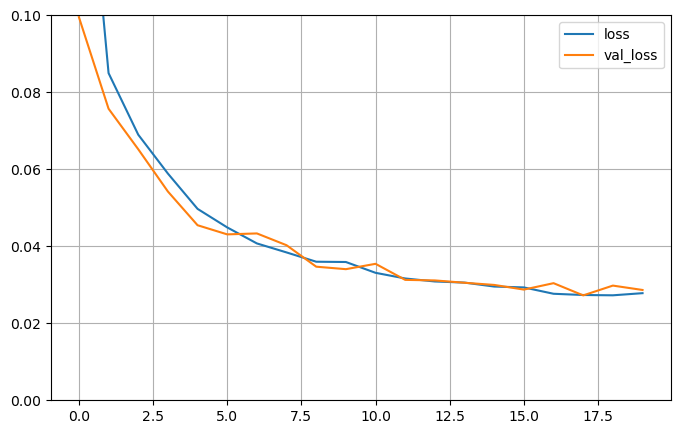

In [111]:
pd.DataFrame(train.history).plot(figsize=(8,5))
plt.grid(True)
plt.ylim(0,0.1)
plt.show()

In [112]:
model.evaluate(x_test,y_test)

32/32 [==============================] - 0s 2ms/step - loss: 0.0280


0.02795480191707611

32/32 [==============================] - 0s 1ms/step


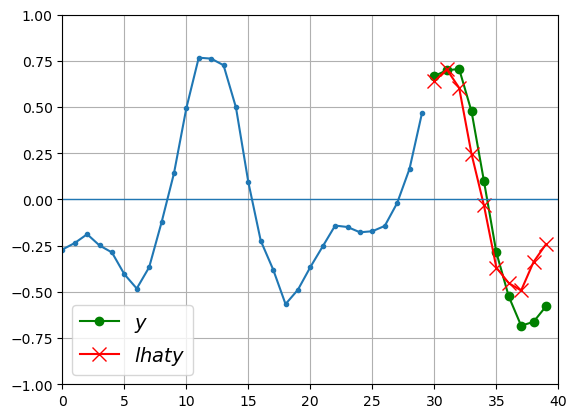

In [113]:
y_pred=model.predict(x_test)
i=0
plot_seq(x_test[i,:,0],y_test[i],y_pred[i])

Sequence to sequence

In [114]:
np.random.seed(1)
n_seq = 30
n_pred = 10
series = generate_time_series(5000, n_seq+ n_pred)
series.shape

(5000, 40, 1)

In [ ]:
x_train, y_train = series[:3000, :n_seq], series[:3000,-n_pred:,0]
x_valid, y_valid = series[3000:4000, :n_seq], series[3000:4000,-n_pred:,0]
x_test, y_test = series[4000:, :n_seq], series[4000:, -n_pred:,0]

In [115]:
y = np.empty((5000, n_seq,n_pred))
for step_ahead in range(1,n_pred + 1):
    y[..., step_ahead - 1]=series[..., step_ahead:step_ahead + n_seq, 0]
y_train = y[:3000]
y_valid = y[3000:4000]
y_test = y[4000:]

In [116]:
x_train.shape, y_train.shape

((3000, 30, 1), (3000, 30, 10))

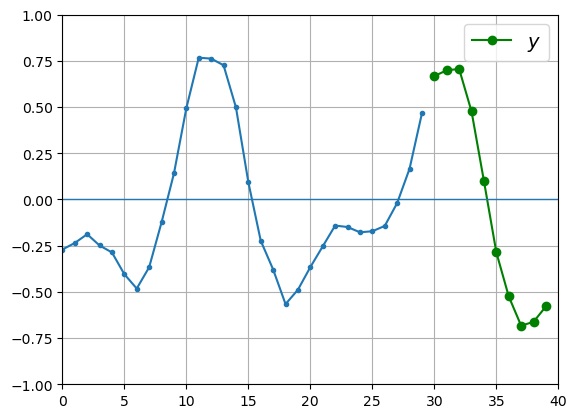

In [120]:
plot_seq(x_test[0, :, 0],y_test[0,-1])

build model

In [121]:
np.random.seed(1)
tf.random.set_seed(1)

model = keras.models.Sequential([
    keras.layers.SimpleRNN(20,return_sequences=True,input_shape=[None, 1]),
    keras.layers. SimpleRNN(20,return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

In [123]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_20 (SimpleRNN)   (None, None, 20)          440       
                                                                 
 simple_rnn_21 (SimpleRNN)   (None, None, 20)          820       
                                                                 
 time_distributed (TimeDist  (None, None, 10)          210       
 ributed)                                                        
                                                                 
Total params: 1470 (5.74 KB)
Trainable params: 1470 (5.74 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [129]:
def last_time_step_mse(y_true, y_pred):
    return keras.metrics.mean_squared_error(y_true[:,-1], y_pred[:,-1])
model.compile(loss='mse',optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.01),
    metrics=[last_time_step_mse])

In [130]:
train = model.fit(x_train, y_train,epochs=20, validation_data=(x_valid, y_valid))

Epoch 1/20
94/94 [==============================] - 1s 6ms/step - loss: 0.1031 - last_time_step_mse: 0.0961 - val_loss: 0.0854 - val_last_time_step_mse: 0.0753
Epoch 2/20
94/94 [==============================] - 1s 5ms/step - loss: 0.0818 - last_time_step_mse: 0.0675 - val_loss: 0.0800 - val_last_time_step_mse: 0.0657
Epoch 3/20
94/94 [==============================] - 1s 5ms/step - loss: 0.0762 - last_time_step_mse: 0.0583 - val_loss: 0.0722 - val_last_time_step_mse: 0.0554
Epoch 4/20
94/94 [==============================] - 1s 5ms/step - loss: 0.0704 - last_time_step_mse: 0.0504 - val_loss: 0.0687 - val_last_time_step_mse: 0.0502
Epoch 5/20
94/94 [==============================] - 1s 5ms/step - loss: 0.0636 - last_time_step_mse: 0.0419 - val_loss: 0.0622 - val_last_time_step_mse: 0.0443
Epoch 6/20
94/94 [==============================] - 1s 5ms/step - loss: 0.0597 - last_time_step_mse: 0.0375 - val_loss: 0.0547 - val_last_time_step_mse: 0.0325
Epoch 7/20
94/94 [======================

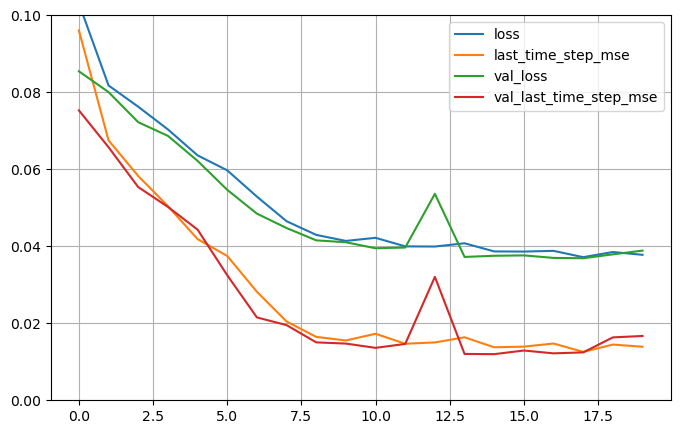

In [131]:
pd.DataFrame(train.history).plot(figsize=(8,5))
plt.grid(True)
plt.ylim(0,0.1)
plt.show()

In [132]:
model.evaluate(x_test,y_test)

32/32 [==============================] - 0s 2ms/step - loss: 0.0385 - last_time_step_mse: 0.0160


[0.03845316544175148, 0.015988284721970558]

In [133]:
y_pred = model.predict(x_test)
y_test.shape, y_pred.shape

32/32 [==============================] - 0s 2ms/step


((1000, 30, 10), (1000, 30, 10))

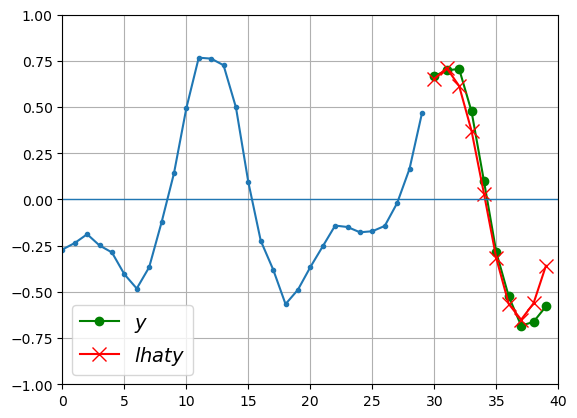

In [134]:
i = 0
plot_seq(x_test[i, :, 0], y_test[i, -1], y_pred[i, -1])